In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d brammasosendifu/orang-puh-laki-kel-24

 92% 44.0M/47.7M [00:00<00:00, 88.3MB/s]
100% 47.7M/47.7M [00:00<00:00, 90.1MB/s]


In [ ]:
import zipfile,os
zip_lcl = '/content/orang-puh-laki-kel-24.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/content')
rzip.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
BATCH_SIZE = 7

In [ ]:
#membuat base direktori dan mengeceknya
base_dir = '/content/TRAIN'
os.listdir(base_dir)

['tempat makan', 'tempat minum', 'tempat soup']

In [ ]:
# membuat direktori batu
rock_dir = os.path.join(base_dir, 'tempat makan')

# membuat direktori gunting
scissors_dir = os.path.join(base_dir, 'tempat minum')

# membuat direktori kertas
paper_dir = os.path.join(base_dir, 'tempat soup')

In [ ]:
#cek jumlah gambar batu
print('total training rock images:', len(os.listdir(rock_dir)))
#cek jumlah gambar gunting
print('total training scissors images:', len(os.listdir(scissors_dir)))
#cek jumlah gambar kertas
print('total training paper images:', len(os.listdir(paper_dir)))

total training rock images: 80
total training scissors images: 80
total training paper images: 80


In [ ]:
#train datagen
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest',
    validation_split=0.1)

In [ ]:
#train generator dan validation generator
train_dir = '/content/TRAIN'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data


valid_dir = '/content/VALIDATION'
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 216 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#ringkasan dari model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

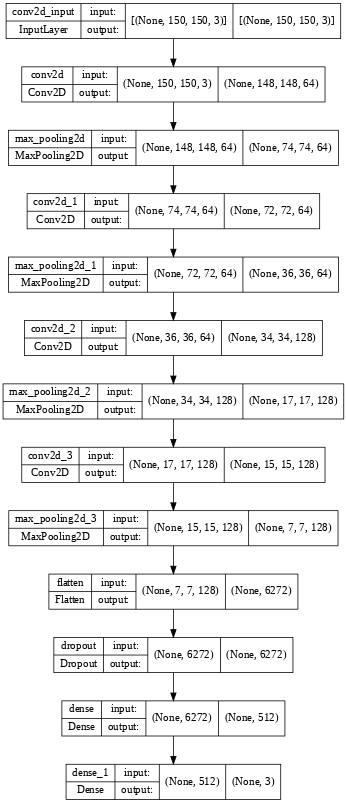

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=25, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3)

Epoch 1/25
25/25 [==============================] - 26s 913ms/step - loss: 1.3402 - accuracy: 0.3793 - val_loss: 1.1039 - val_accuracy: 0.2857
Epoch 2/25
25/25 [==============================] - 20s 776ms/step - loss: 1.1555 - accuracy: 0.4253 - val_loss: 0.9802 - val_accuracy: 0.5238
Epoch 3/25
25/25 [==============================] - 19s 744ms/step - loss: 0.9126 - accuracy: 0.5517 - val_loss: 0.9305 - val_accuracy: 0.4762
Epoch 4/25
25/25 [==============================] - 19s 745ms/step - loss: 0.8677 - accuracy: 0.5862 - val_loss: 1.0165 - val_accuracy: 0.5714
Epoch 5/25
25/25 [==============================] - 19s 743ms/step - loss: 1.0599 - accuracy: 0.5690 - val_loss: 2.1756 - val_accuracy: 0.3333
Epoch 6/25
25/25 [==============================] - 21s 822ms/step - loss: 0.8434 - accuracy: 0.6149 - val_loss: 0.6407 - val_accuracy: 0.7143
Epoch 7/25
25/25 [==============================] - 19s 739ms/step - loss: 0.6146 - accuracy: 0.7714 - val_loss: 0.5576 - val_accuracy: 0.7619

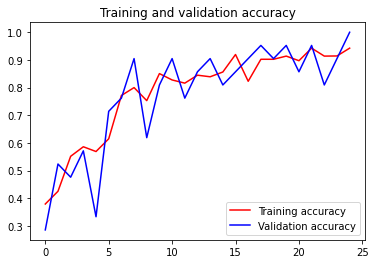

<Figure size 432x288 with 0 Axes>

In [ ]:
#buat grafik akurasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save('model.hdf5')